**Install required Library.**

In [ ]:
pip install langchain_google_genai langchain_chroma

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 5.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 100.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 59.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 71.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 98.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.5/118.5 kB 13.2 MB/s eta 0:0

**Import importent library and set Gemini Key.**

In [ ]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings
from langchain_chroma import Chroma
import os
import getpass
if not os.environ.get("GOOGLE_API_KEY"):
  os.environ["GOOGLE_API_KEY"] = getpass.getpass("Enter API key for Google Gemini: ")

Enter API key for Google Gemini: ··········


**Setting Embeddings model and Vector DB**

In [ ]:
embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")
vector_store = Chroma(
    collection_name="example_collection",
    embedding_function=embeddings,
    persist_directory="./chroma_langchain_db",  # Where to save data locally, remove if not necessary
)

**Embeddings & Vector Database**

In [ ]:
test = ["changing my password","Resetting logincredentials","Modify accountaccess info","how are you?"]
print(vector_store.add_texts(test))

['bf72f236-c8c7-4bfe-b13e-b0332c549f85', '089f3b0a-73cf-4cc8-a11d-29d64e29bf7a', '89e73353-2cf4-492d-802f-fb8c90d3c306', '686f3265-d4c5-43eb-8787-e6c79a5086f5']


**Sementic Search**

In [ ]:
retrieved_docs = vector_store.similarity_search("Password ",k=3)
retrieved_docs

[Document(id='bf72f236-c8c7-4bfe-b13e-b0332c549f85', metadata={}, page_content='changing my password'),
 Document(id='089f3b0a-73cf-4cc8-a11d-29d64e29bf7a', metadata={}, page_content='Resetting logincredentials'),
 Document(id='89e73353-2cf4-492d-802f-fb8c90d3c306', metadata={}, page_content='Modify accountaccess info')]

**Storing Data with Metadata**

In [ ]:
 from langchain.schema import Document
test = [Document(page_content="who are you.", metadata={"Topic":"other"}),Document(page_content="MLOps is best.", metadata={"Topic":"AI"}),Document(page_content="AI is Awesome.", metadata={"Topic":"AI"}),Document(page_content="AI Use NLP.", metadata={"Topic":"AI"})]
print(vector_store.add_documents(documents=test))

['82c8f2a4-6fd0-4f02-84a5-3beea40f12b4', '95b5c403-a30e-42fc-a26c-378b6098b5be', 'cb9b4855-9724-41de-9b74-606c9106fd62', '12c2097b-52e7-42a2-9188-1f0c1d6fe4f9']


**Sementic Search with filter**

In [ ]:
retrieved_docs = vector_store.similarity_search("machine learning",k=4,filter={"Topic": {"$eq":'AI'}})
retrieved_docs

[]

In [ ]:
all_docs = vector_store.get(include=["documents", "embeddings", "metadatas"])
print(all_docs)

{'ids': ['bf72f236-c8c7-4bfe-b13e-b0332c549f85', '089f3b0a-73cf-4cc8-a11d-29d64e29bf7a', '89e73353-2cf4-492d-802f-fb8c90d3c306', '686f3265-d4c5-43eb-8787-e6c79a5086f5', '82c8f2a4-6fd0-4f02-84a5-3beea40f12b4', '95b5c403-a30e-42fc-a26c-378b6098b5be', 'cb9b4855-9724-41de-9b74-606c9106fd62', '12c2097b-52e7-42a2-9188-1f0c1d6fe4f9'], 'embeddings': array([[ 0.02146408, -0.0044333 , -0.07722433, ..., -0.00190652,
        -0.0363469 ,  0.01991668],
       [ 0.04144152,  0.00651161, -0.06767381, ...,  0.01598457,
        -0.05439175,  0.03736488],
       [ 0.04380333, -0.00401537, -0.05212243, ...,  0.00493329,
        -0.05253086,  0.04115017],
       ...,
       [ 0.06055159, -0.00900685, -0.04989437, ...,  0.01935475,
         0.0053391 ,  0.02632103],
       [ 0.01296441, -0.01006378, -0.0643553 , ...,  0.00402813,
        -0.02100904,  0.04377606],
       [ 0.02813264, -0.03545972, -0.0587563 , ...,  0.01974024,
        -0.02300814,  0.05231528]]), 'documents': ['changing my password', 'Res

In [ ]:
import pandas as pd

df = pd.DataFrame({
    "ID": all_docs["ids"],
    "Text": all_docs["documents"],
    "Metadata": all_docs["metadatas"],
    "Embedding (truncated)": [vec[:5] if vec is not None else None for vec in all_docs["embeddings"]]

})

df

,ID,Text,Metadata,Embedding (truncated)
0,bf72f236-c8c7-4bfe-b13e-b0332c549f85,changing my password,None,"[0.02146407775580883, -0.004433295223861933, -..."
1,089f3b0a-73cf-4cc8-a11d-29d64e29bf7a,Resetting logincredentials,None,"[0.04144152253866196, 0.0065116118639707565, -..."
2,89e73353-2cf4-492d-802f-fb8c90d3c306,Modify accountaccess info,None,"[0.04380333423614502, -0.004015367012470961, -..."
3,686f3265-d4c5-43eb-8787-e6c79a5086f5,how are you?,None,"[0.04195541888475418, 0.008283206261694431, -0..."
4,82c8f2a4-6fd0-4f02-84a5-3beea40f12b4,who are you.,{'Topic': 'other'},"[0.03634915128350258, 0.00030515631078742445, ..."
5,95b5c403-a30e-42fc-a26c-378b6098b5be,MLOps is best.,{'Topic': 'AI'},"[0.060551587492227554, -0.009006849490106106, ..."
6,cb9b4855-9724-41de-9b74-606c9106fd62,AI is Awesome.,{'Topic': 'AI'},"[0.012964408844709396, -0.010063780471682549, ..."
7,12c2097b-52e7-42a2-9188-1f0c1d6fe4f9,AI Use NLP.,{'Topic': 'AI'},"[0.028132636100053787, -0.0354597233235836, -0..."


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

**Extract embeddings and labels from all_docs:**

In [ ]:
# Ensure embeddings are not None
embeddings = [vec for vec in all_docs["embeddings"] if vec is not None]
labels = [doc[:30] + "..." for doc, vec in zip(all_docs["documents"], all_docs["embeddings"]) if vec is not None]

# Convert to NumPy array
embedding_array = np.array(embeddings)

**2D Visualization**

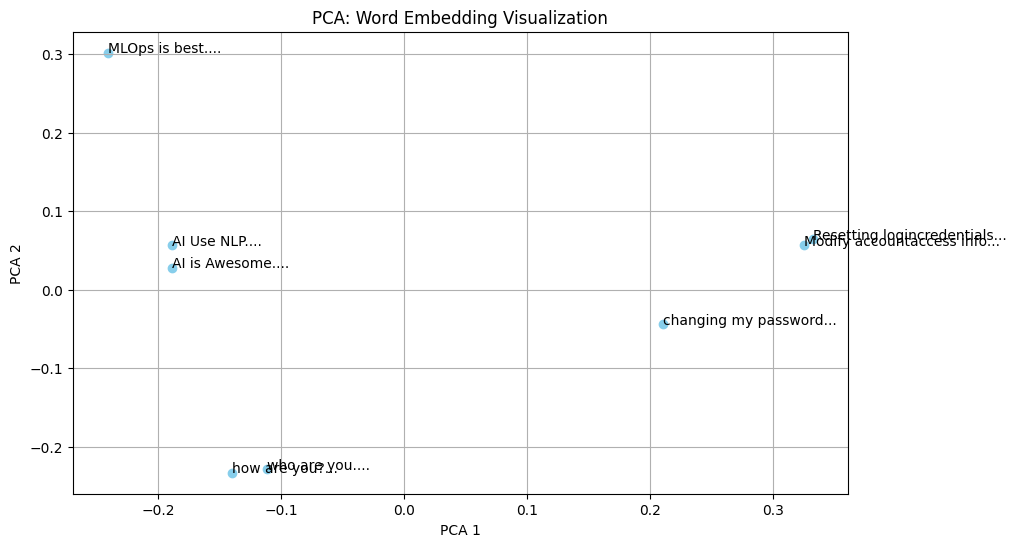

In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(embedding_array)

plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c='skyblue')

for i, label in enumerate(labels):
    plt.annotate(label, (pca_result[i, 0], pca_result[i, 1]))

plt.title("PCA: Word Embedding Visualization")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()